In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

In the video we have discussed that for MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [41]:
N = 125
x = np.random.randint(low=1, high=100, size=N)
x

array([25, 89, 71, 18, 40, 79, 89, 58, 90, 15,  5,  1, 59, 12, 26, 73, 76,
       16,  9, 72, 68, 93, 14, 77, 99, 47, 62, 48, 51, 51, 82, 27, 85, 90,
       79, 17, 69, 81, 82, 24, 51, 50,  4, 60, 13, 55, 90, 21, 43, 54, 10,
       18, 16, 66, 16, 88, 69, 29,  1, 38, 38, 94,  8, 70, 93, 86, 55, 25,
       60, 86, 91, 92, 81, 46, 48, 17,  4, 19, 10, 60, 71, 15,  9, 36, 54,
       22, 57,  7, 25, 27,  5, 44, 83, 51, 25, 85, 36, 63,  5,  8, 74, 84,
       90, 88, 85, 94, 22, 59, 47,  3, 51,  7, 91, 19, 44, 40, 61, 37, 99,
       58, 55, 22, 19, 90, 52])

1) Compute *normalized* weights:

In [42]:
inv_x = 1.0/x
inv_x

array([ 0.04      ,  0.01123596,  0.01408451,  0.05555556,  0.025     ,
        0.01265823,  0.01123596,  0.01724138,  0.01111111,  0.06666667,
        0.2       ,  1.        ,  0.01694915,  0.08333333,  0.03846154,
        0.01369863,  0.01315789,  0.0625    ,  0.11111111,  0.01388889,
        0.01470588,  0.01075269,  0.07142857,  0.01298701,  0.01010101,
        0.0212766 ,  0.01612903,  0.02083333,  0.01960784,  0.01960784,
        0.01219512,  0.03703704,  0.01176471,  0.01111111,  0.01265823,
        0.05882353,  0.01449275,  0.01234568,  0.01219512,  0.04166667,
        0.01960784,  0.02      ,  0.25      ,  0.01666667,  0.07692308,
        0.01818182,  0.01111111,  0.04761905,  0.02325581,  0.01851852,
        0.1       ,  0.05555556,  0.0625    ,  0.01515152,  0.0625    ,
        0.01136364,  0.01449275,  0.03448276,  1.        ,  0.02631579,
        0.02631579,  0.0106383 ,  0.125     ,  0.01428571,  0.01075269,
        0.01162791,  0.01818182,  0.04      ,  0.01666667,  0.01

In [43]:
w = inv_x/sum(inv_x)
# w = np.array([1 / len(x) for i in range(len(x))])
w

array([ 0.005588  ,  0.00156966,  0.00196761,  0.00776111,  0.0034925 ,
        0.00176835,  0.00156966,  0.00240862,  0.00155222,  0.00931333,
        0.02794   ,  0.1397    ,  0.0023678 ,  0.01164167,  0.00537308,
        0.0019137 ,  0.00183816,  0.00873125,  0.01552222,  0.00194028,
        0.00205441,  0.00150215,  0.00997857,  0.00181429,  0.00141111,
        0.00297234,  0.00225323,  0.00291042,  0.00273922,  0.00273922,
        0.00170366,  0.00517407,  0.00164353,  0.00155222,  0.00176835,
        0.00821765,  0.00202464,  0.00172469,  0.00170366,  0.00582083,
        0.00273922,  0.002794  ,  0.034925  ,  0.00232833,  0.01074615,
        0.00254   ,  0.00155222,  0.00665238,  0.00324884,  0.00258704,
        0.01397   ,  0.00776111,  0.00873125,  0.00211667,  0.00873125,
        0.0015875 ,  0.00202464,  0.00481724,  0.1397    ,  0.00367632,
        0.00367632,  0.00148617,  0.0174625 ,  0.00199571,  0.00150215,
        0.00162442,  0.00254   ,  0.005588  ,  0.00232833,  0.00

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [44]:
idxs = np.argsort(w)
sorted_w = w[idxs]
sorted_w

array([ 0.00141111,  0.00141111,  0.00148617,  0.00148617,  0.00150215,
        0.00150215,  0.00151848,  0.00153516,  0.00153516,  0.00155222,
        0.00155222,  0.00155222,  0.00155222,  0.00155222,  0.00156966,
        0.00156966,  0.0015875 ,  0.0015875 ,  0.00162442,  0.00162442,
        0.00164353,  0.00164353,  0.00164353,  0.0016631 ,  0.00168313,
        0.00170366,  0.00170366,  0.00172469,  0.00172469,  0.00176835,
        0.00176835,  0.00181429,  0.00183816,  0.00188784,  0.0019137 ,
        0.00194028,  0.00196761,  0.00196761,  0.00199571,  0.00202464,
        0.00202464,  0.00205441,  0.00211667,  0.00221746,  0.00225323,
        0.00229016,  0.00232833,  0.00232833,  0.00232833,  0.0023678 ,
        0.0023678 ,  0.00240862,  0.00240862,  0.00245088,  0.00254   ,
        0.00254   ,  0.00254   ,  0.00258704,  0.00258704,  0.00268654,
        0.00273922,  0.00273922,  0.00273922,  0.00273922,  0.00273922,
        0.002794  ,  0.00291042,  0.00291042,  0.00297234,  0.00

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

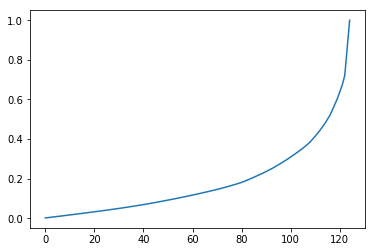

sorted_w_cumsum:  [ 0.00141111  0.00282222  0.00430839  0.00579456  0.00729671  0.00879886
  0.01031734  0.01185251  0.01338767  0.01493989  0.01649212  0.01804434
  0.01959656  0.02114878  0.02271845  0.02428811  0.02587561  0.02746311
  0.02908753  0.03071195  0.03235548  0.03399901  0.03564253  0.03730563
  0.03898876  0.04069242  0.04239608  0.04412077  0.04584546  0.04761382
  0.04938217  0.05119646  0.05303461  0.05492245  0.05683615  0.05877643
  0.06074403  0.06271164  0.06470735  0.06673199  0.06875663  0.07081104
  0.07292771  0.07514517  0.0773984   0.07968856  0.08201689  0.08434523
  0.08667356  0.08904136  0.09140915  0.09381777  0.09622639  0.09867727
  0.10121727  0.10375727  0.10629727  0.10888431  0.11147135  0.11415788
  0.1168971   0.11963632  0.12237553  0.12511475  0.12785396  0.13064796
  0.13355838  0.1364688   0.13944114  0.14241348  0.14545043  0.14862543
  0.15180043  0.15504927  0.15854177  0.16203427  0.16571059  0.1693869
  0.17316258  0.17704313  0.180923

In [45]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [46]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

115

5) Finally, your answer is sample at that position:

In [47]:
pos = idxs[idx]
sorted(x)[pos]

71

In [50]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(sorted(x)[pos], np.median(x)))

Data:  [25 89 71 18 40 79 89 58 90 15  5  1 59 12 26 73 76 16  9 72 68 93 14 77 99
 47 62 48 51 51 82 27 85 90 79 17 69 81 82 24 51 50  4 60 13 55 90 21 43 54
 10 18 16 66 16 88 69 29  1 38 38 94  8 70 93 86 55 25 60 86 91 92 81 46 48
 17  4 19 10 60 71 15  9 36 54 22 57  7 25 27  5 44 83 51 25 85 36 63  5  8
 74 84 90 88 85 94 22 59 47  3 51  7 91 19 44 40 61 37 99 58 55 22 19 90 52]
Sorted data:  [ 1  1  3  4  4  5  5  5  7  7  8  8  9  9 10 10 12 13 14 15 15 16 16 16 17
 17 18 18 19 19 19 21 22 22 22 24 25 25 25 25 26 27 27 29 36 36 37 38 38 40
 40 43 44 44 46 47 47 48 48 50 51 51 51 51 51 52 54 54 55 55 55 57 58 58 59
 59 60 60 60 61 62 63 66 68 69 69 70 71 71 72 73 74 76 77 79 79 81 81 82 82
 83 84 85 85 85 86 86 88 88 89 89 90 90 90 90 90 91 91 92 93 93 94 94 99 99]
Weighted median: 71, Median: 51


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 